# Estimating a Linear Equation for Risk Data

The __data__ was generated using __paytm investments__ questions, has __10__ variables along with some added bias. These variables were added to a non-linear equation that gave us the output column.

The __goal__ of this project/experiment is to evaluate different libraries and methodologies, based on their effectiveness to predict importance of features in the dataset. Basically we reverse engineer the dataset to find out what impacts the outcome most. 

The libraries and methods we are trying out often generate a linear formula where variables with larger coefficients are more important to the outcome or they hold more weight.

Our original nonlinear equation used to generate the dataset is now difficult to compare with these, we need to generate a linear function.

We can do this using __gradient descent__, we have a large dataset with outcomes generated using a "non-linear model" (our equation) and we need to convert it to a new "linear hypothesis function" of the form:

Y_predicted = theta_1 * x_11 + theta_2 * x_21 + theta_3 * x_22.... + theta_10 * x_62

I have tried two algorithms, gradient descent and it's more realistic version, stochastic gradient descent.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#### Using the stratififed dataset, replace with another if you want to.

In [2]:
df = pd.read_csv("AT/risk_stratified_sample_14oct2019.csv")

In [3]:
df.drop(df.columns[df.columns.str.contains('unnamed',case=False)],axis=1,inplace=True)
df.head()

,x_11,x_21,x_22,x_31,x_32,x_41,x_51,x_52,x_61,x_62,output,categories
0,0.2,1.0,1.0,0.4,0.3,0.4,0.65,0.50,0.9,0.2,1.696900,2.0
1,1.0,0.8,1.0,0.6,1.0,0.4,0.65,0.80,0.9,0.3,4.830400,5.0
2,0.5,1.0,1.0,0.4,0.3,0.4,0.60,0.60,1.0,0.9,2.840650,3.0
3,1.0,0.8,0.4,0.8,0.1,0.8,1.00,0.65,1.0,0.9,4.123420,4.0
4,0.5,1.0,0.6,1.0,0.3,0.4,1.00,0.50,0.2,0.9,2.682875,3.0


#### Huge dataframe

In [4]:
print(df.shape)

(943718, 12)


## Gradient Descent


The gradient descent algorithm in a nutshell:

    1) Takes parameters as your Data along with the outcome column and our linear hypothesis function.
    
    2) Estimate the thetas:The theta is generally randomly estimated in the beginning and updated over time, but the logistic regression classifier has a decent accuracy so instead of a random theta I averaged the coefficients from the one vs rest models used by our multiclass logistic classifier. (Just as a start point)
    
    3) After this we generate new Y(predictions) values using the linear hypothesis function and thetas
    
    4) The original/actual Y minus the new Y values gives us an "Error" , summing the error over the whole dataset gives us the "Cost" and we want to minimize this cost
    
    5) This means we want to bring the linear function predictions really close to the non linear original outcomes.
    
    6) We update the theta values
        a) Find partial derivatives of the cost function w.r.t thetas
        b) Multiply the derivatives by a learning rate(used to decide how fast we want to move up or down the slope)
        c) Subtract these from their respective thetas
        
    7) Repeat the whole thing with new thetas
    
    8) Stop when the iterations are over or if the change in thetas stays below some tolerance level.


### Logistic Regression to Estimate Initial Thetas

Create datasets for LR model.

I'm using categories for classification in the Logistic Regression classifier. 

In [5]:
X = df.drop(columns =['output','categories'])
Y = df.categories

Splits for LR model.

In [6]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

In [7]:
model = LogisticRegression(penalty='l2',solver = 'lbfgs')
model.fit(X_train, Y_train)

/home/ubuntu/environments/py_36_env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Accuracy of the LR model (it's alright, good enough to use the coefficients for our starting theta)

In [8]:
y_lr_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(Y_test, y_lr_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.75


Logistic regression using sklearn uses a one vs rest system; that means that there is one classifier trained for each class

This is our coefficient array for each variable (10) and each class (5)

In [9]:
coef_array = model.coef_
print(coef_array)

[[-7.47759548e+01 -4.26105155e+01 -6.81742779e+00 -3.98523630e+00
  -2.28873938e+01 -1.79094669e+00 -5.88074644e+00 -6.30335733e+00
  -4.01238779e+00 -6.39780193e-01]
 [-3.53387148e+00  3.86180064e-01 -3.52358271e-01 -2.27671901e-01
  -8.14598532e-03 -8.60782449e-02 -3.23139540e-01 -3.33818458e-01
  -2.50824355e-01 -7.54254707e-02]
 [ 1.52042540e+00  1.42477639e-01  1.74983871e-01  1.65387442e-01
   9.54130762e-01  4.53442582e-02  2.10377485e-01  1.87149614e-01
   1.54636538e-01  1.09743850e-02]
 [ 9.49487021e+00  4.38224080e+00 -1.80567409e-02 -2.89646664e-01
  -3.66508274e-01 -1.40334593e-01 -7.53298373e-01 -8.16470708e-01
  -3.88730556e-01 -2.48789242e-01]
 [ 4.78621112e+01  4.40601361e+01  1.32546925e+01  9.59358941e+00
   1.41320337e+01  4.84085788e+00  1.57157057e+01  1.87981572e+01
   1.04743777e+01  4.25277078e+00]]


I think we could average the coefficient for each class per variable.

In [10]:
coef_array.sum(axis=0)/5

array([-3.8864839 ,  1.27210383,  1.24836672,  1.0512844 , -1.63517673,
        0.57376852,  1.79377976,  2.30633206,  1.19541431,  0.65995005])

In [11]:
theta = coef_array.sum(axis=0)/5
print(theta)

[-3.8864839   1.27210383  1.24836672  1.0512844  -1.63517673  0.57376852
  1.79377976  2.30633206  1.19541431  0.65995005]


In [12]:
len(theta)

10

I had to use categories for the classifier but the data we're originally concerned with is the 'output' column, so I will reassign X and Y for gradient descent. (We want to predict the formula that gives us values closest to output values)

In [13]:
X_new = df.drop(columns =['output','categories'])
Y_new = df.output

In [14]:
#Cost function
def cal_cost(theta,X,y):
    m = len(y)
    y_pred = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(y_pred-y))
    return cost

In [15]:
def gradient_descent(X,y,theta,learning_rate=0.1, iterations=1000):
    m=len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,10))
    for it in range(iterations):
        y_pred = np.dot(X,theta)
        theta = theta - (1/m)*learning_rate*(X.T.dot((y_pred-y)))
        theta_history[it,:] = theta.T
        cost_history[it] = cal_cost(theta,X,y)
    return theta,cost_history,theta_history

Testing the function out for a large learning rate to see where it plateaus and stays constant. After that I'll use those number of iterations to generate final the equation.

In [16]:
theta_gd,cost_history,theta_history = gradient_descent(X_new,Y_new,theta,learning_rate=0.1,iterations=1000)

In [17]:
print(theta_gd)

x_11    2.663673
x_21    1.420705
x_22    0.336652
x_31    0.048391
x_32    0.618651
x_41   -0.583775
x_51    0.013008
x_52   -0.470474
x_61    0.188667
x_62   -0.057476
dtype: float64


Text(0.5, 0, 'Iterations')

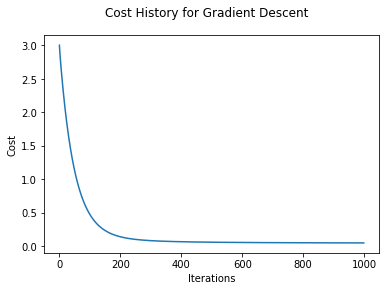

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(cost_history)
plt.suptitle('Cost History for Gradient Descent')
plt.ylabel("Cost")
plt.xlabel("Iterations")

Cost plateaus after 400 till 1000.

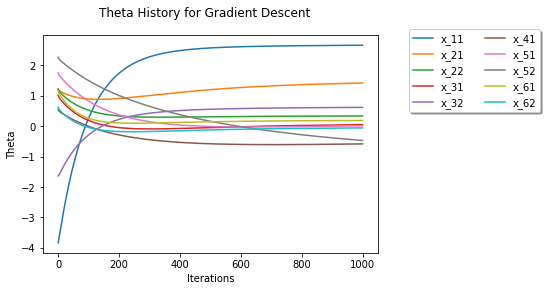

In [19]:
plt.plot(theta_history)
plt.suptitle('Theta History for Gradient Descent')
plt.ylabel("Theta")
plt.xlabel("Iterations")
plt.legend(X.columns,bbox_to_anchor=(1.5, 1.05),ncol=2, fancybox=True, shadow=True)

#### Since the cost plateaus after 400 approx, I will keep the iterations just above 400.

In [32]:
theta_gd1,cost_history1,theta_history = gradient_descent(X_new,Y_new,theta,learning_rate=0.001,iterations=600)

In [33]:
theta_gd1

x_11   -3.553360
x_21    1.159999
x_22    1.127028
x_31    0.914057
x_32   -1.564223
x_41    0.478924
x_51    1.658306
x_52    2.188021
x_61    1.043025
x_62    0.534727
dtype: float64

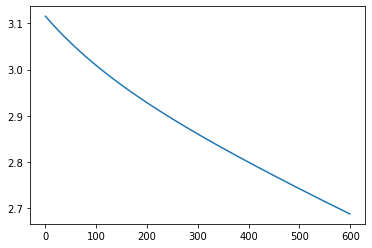

In [34]:
plt.plot(cost_history1)
plt.suptitle('Cost History for Gradient Descent 2')
plt.ylabel("Cost")
plt.xlabel("Iterations")

#### Stochastic Gradient descent reduces the chances of getting caught in a local minima by picking random values of X and Y

In [43]:
def stocashtic_gradient_descent(X,y,theta,learning_rate=0.01,iterations=1):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    
    for it in range(iterations):
        cost =0.0
        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1,X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it]  = cost
        
    return theta, cost_history

!! Under Construction !!

In [51]:
theta_sgd,cost_history_sgd = stochastic_gradient_descent(X_new,Y_new,theta,learning_rate=0.1,iterations=1)

Text(0.5, 0, 'Iterations')

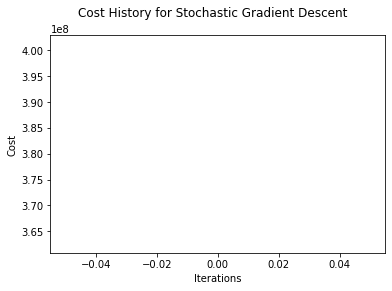

In [52]:
plt.plot(cost_history_sgd)
plt.suptitle('Cost History for Stochastic Gradient Descent')
plt.ylabel("Cost")
plt.xlabel("Iterations")
#only 1 iteration so no history

#### Thetas after SGD

In [56]:
print(theta_sgd[1])

[-2.17950546  0.94913989  0.93474351  0.81521453 -0.81410429  0.52560468
  1.26553249  1.57639167  0.90262826  0.57787314]


#### Random Additional Test:

what happens if I use a random general theta?

In [59]:
Theta1 = [0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01]
print(len(Theta1))

10


In [61]:
theta_gd2,cost_history2,theta_history = gradient_descent(X_new,Y_new,Theta1,learning_rate=0.001,iterations=600)

In [62]:
print(theta_gd2)

x_11    0.506687
x_21    0.515874
x_22    0.363070
x_31    0.367215
x_32    0.386240
x_41    0.326960
x_51    0.386324
x_52    0.394601
x_61    0.333988
x_62    0.343530
dtype: float64


Text(0.5, 0, 'Iterations')

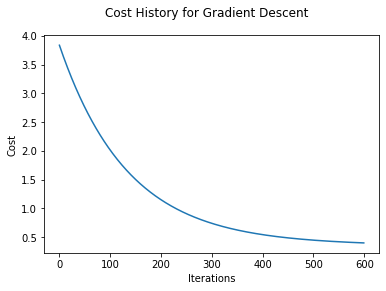

In [63]:
plt.plot(cost_history2)
plt.suptitle('Cost History for Gradient Descent')
plt.ylabel("Cost")
plt.xlabel("Iterations")